# Assignment 05: Learning Phase Transitions 

## Wyatt Smith

## Physics 494

## 04/27/2021

### 1) Supervised Learning in the Ising Model



In [2]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import trange,tqdm
sys.path.append('./include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from IPython.display import display

In [3]:
x = np.loadtxt('data1/Ising2D_config_L30.dat.gz')
y = np.loadtxt('data1/Ising2D_labels_L30.dat')
Tval = np.loadtxt('data1/Ising2D_temps_L30.dat')

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

#### (a)



In [12]:
# load the data
# load the data
x_train, x_tv, y_train, y_tv = train_test_split(x, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_tv, y_tv, test_size=0.5)


# determine the properties
rows,cols = 30,30
num_classes = 2

# reshape and rescale
x_train = x_train.reshape(x_train.shape[0], rows*cols).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], rows*cols).astype('float32')/255

# use a built-in function to get 1-hot encoding
y_train_hot = keras.utils.to_categorical(y_train, num_classes)
y_test_hot = keras.utils.to_categorical(y_test, num_classes)


#### (b)


In [13]:
model = keras.Sequential(
[
    layers.Dense(128,input_shape=(rows*cols,),activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               115328    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 115,586
Trainable params: 115,586
Non-trainable params: 0
_________________________________________________________________


In [14]:
batch_size = 32
epochs = 13

training = model.fit(x_train,y_train_hot, batch_size=batch_size, epochs=epochs,
                     verbose=1, validation_data=(x_test,y_test_hot))

Epoch 1/13
400/400 [==============================] - 1s 2ms/step - loss: 0.2967 - accuracy: 0.9106 - val_loss: 0.0573 - val_accuracy: 0.9850
Epoch 2/13
400/400 [==============================] - 1s 2ms/step - loss: 0.0484 - accuracy: 0.9830 - val_loss: 0.0475 - val_accuracy: 0.9831
Epoch 3/13
400/400 [==============================] - 1s 1ms/step - loss: 0.0402 - accuracy: 0.9840 - val_loss: 0.0425 - val_accuracy: 0.9856
Epoch 4/13
400/400 [==============================] - 1s 1ms/step - loss: 0.0299 - accuracy: 0.9890 - val_loss: 0.0341 - val_accuracy: 0.9856
Epoch 5/13
400/400 [==============================] - 1s 1ms/step - loss: 0.0262 - accuracy: 0.9895 - val_loss: 0.0405 - val_accuracy: 0.9869
Epoch 6/13
400/400 [==============================] - 1s 1ms/step - loss: 0.0218 - accuracy: 0.9915 - val_loss: 0.0301 - val_accuracy: 0.9887
Epoch 7/13
400/400 [==============================] - 1s 1ms/step - loss: 0.0204 - accuracy: 0.9923 - val_loss: 0.0299 - val_accuracy: 0.9887
Epoch 

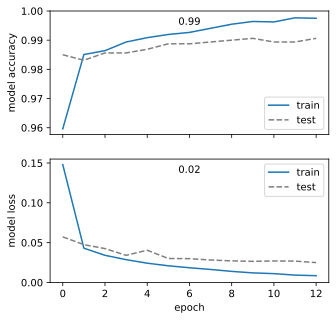

In [15]:
# look into training history
fig,ax = plt.subplots(2,1, sharex=True, figsize=(5,5))

score = model.evaluate(x_test, y_test_hot, verbose=0);

# accuracy
ax[0].plot(training.history['accuracy'], color=colors[0])
ax[0].plot(training.history['val_accuracy'], ls='--', color=colors[-3])
ax[0].set_ylabel('model accuracy')
ax[0].legend(['train', 'test'], loc='best')
ax[0].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center',verticalalignment='top', 
                         transform=ax[0].transAxes)
ax[0].set_ylim(top=1)

# loss
ax[1].plot(training.history['loss'], color=colors[0])
ax[1].plot(training.history['val_loss'], ls='--', color=colors[-3])
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].set_ylim(bottom=0)
ax[1].text(0.5,0.95,f'{score[0]:.2f}',horizontalalignment='center',verticalalignment='top', 
                         transform=ax[1].transAxes)
ax[1].legend(['train', 'test'], loc='best');

There is some evidence of overfitting arounf the tenth epoch, as evidenced by the slight depression in model accuracy, which is more pronouncd in the test data. Despite this, the model is already doing quite well. In the next section, we will try to optimize this a bit further, hopefully raising the accuracy on the test data somewhat. We are already at near 100% accuracy, however, so there is not much room for improvement. 

#### (c) 

First I try making the model deeper and fatter:

In [17]:
model2 = keras.Sequential(
[
    layers.Dense(128,input_shape=(rows*cols,),activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model2.summary()

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               115328    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 514       
Total params: 148,866
Trainable params: 148,866
Non-trainable params: 0
_________________________________________________________________


In [18]:
batch_size = 32
epochs = 13

training = model2.fit(x_train,y_train_hot, batch_size=batch_size, epochs=epochs,
                     verbose=1, validation_data=(x_test,y_test_hot))

Epoch 1/13
400/400 [==============================] - 1s 2ms/step - loss: 0.1907 - accuracy: 0.9300 - val_loss: 0.0431 - val_accuracy: 0.9850
Epoch 2/13
400/400 [==============================] - 1s 2ms/step - loss: 0.0279 - accuracy: 0.9890 - val_loss: 0.0300 - val_accuracy: 0.9894
Epoch 3/13
400/400 [==============================] - 1s 2ms/step - loss: 0.0210 - accuracy: 0.9929 - val_loss: 0.0397 - val_accuracy: 0.9875
Epoch 4/13
400/400 [==============================] - 1s 2ms/step - loss: 0.0184 - accuracy: 0.9924 - val_loss: 0.0266 - val_accuracy: 0.9900
Epoch 5/13
400/400 [==============================] - 1s 2ms/step - loss: 0.0093 - accuracy: 0.9962 - val_loss: 0.0262 - val_accuracy: 0.9919
Epoch 6/13
400/400 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.0306 - val_accuracy: 0.9919
Epoch 7/13
400/400 [==============================] - 1s 2ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.0375 - val_accuracy: 0.9894
Epoch 

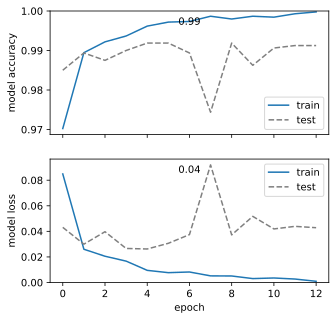

In [19]:
# look into training history
fig,ax = plt.subplots(2,1, sharex=True, figsize=(5,5))

score = model2.evaluate(x_test, y_test_hot, verbose=0);

# accuracy
ax[0].plot(training.history['accuracy'], color=colors[0])
ax[0].plot(training.history['val_accuracy'], ls='--', color=colors[-3])
ax[0].set_ylabel('model accuracy')
ax[0].legend(['train', 'test'], loc='best')
ax[0].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center',verticalalignment='top', 
                         transform=ax[0].transAxes)
ax[0].set_ylim(top=1)

# loss
ax[1].plot(training.history['loss'], color=colors[0])
ax[1].plot(training.history['val_loss'], ls='--', color=colors[-3])
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].set_ylim(bottom=0)
ax[1].text(0.5,0.95,f'{score[0]:.2f}',horizontalalignment='center',verticalalignment='top', 
                         transform=ax[1].transAxes)
ax[1].legend(['train', 'test'], loc='best');

This model gave me higher accuracies on both sets of data. It appears that there was some overfitting after the 6th epoch, however. 

I repeat this procedure once more, making the network deeper/fatter: 

In [24]:
model3 = keras.Sequential(
[
    layers.Dense(128,input_shape=(rows*cols,),activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model3.summary()

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               115328    
_________________________________________________________________
dense_18 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_19 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 514       
Total params: 411,778
Trainable params: 411,778
Non-trainable params: 0
_________________________________________________________________


In [27]:
batch_size = 32
epochs = 10

training = model3.fit(x_train,y_train_hot, batch_size=batch_size, epochs=epochs,
                     verbose=1, validation_data=(x_test,y_test_hot))

Epoch 1/10
400/400 [==============================] - 1s 3ms/step - loss: 0.0085 - accuracy: 0.9967 - val_loss: 0.0324 - val_accuracy: 0.9925
Epoch 2/10
400/400 [==============================] - 1s 3ms/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 0.0290 - val_accuracy: 0.9919
Epoch 3/10
400/400 [==============================] - 1s 3ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0373 - val_accuracy: 0.9931
Epoch 4/10
400/400 [==============================] - 1s 3ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0411 - val_accuracy: 0.9931
Epoch 5/10
400/400 [==============================] - 1s 3ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0456 - val_accuracy: 0.9931
Epoch 6/10
400/400 [==============================] - 1s 3ms/step - loss: 3.2060e-05 - accuracy: 1.0000 - val_loss: 0.0572 - val_accuracy: 0.9925
Epoch 7/10
400/400 [==============================] - 1s 3ms/step - loss: 1.0010e-05 - accuracy: 1.0000 - val_loss: 0.0601 - val_accuracy: 0.992

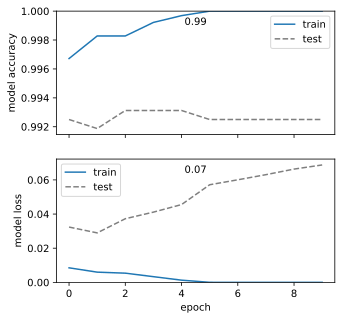

In [28]:
# look into training history
fig,ax = plt.subplots(2,1, sharex=True, figsize=(5,5))

score = model3.evaluate(x_test, y_test_hot, verbose=0);

# accuracy
ax[0].plot(training.history['accuracy'], color=colors[0])
ax[0].plot(training.history['val_accuracy'], ls='--', color=colors[-3])
ax[0].set_ylabel('model accuracy')
ax[0].legend(['train', 'test'], loc='best')
ax[0].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center',verticalalignment='top', 
                         transform=ax[0].transAxes)
ax[0].set_ylim(top=1)

# loss
ax[1].plot(training.history['loss'], color=colors[0])
ax[1].plot(training.history['val_loss'], ls='--', color=colors[-3])
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].set_ylim(bottom=0)
ax[1].text(0.5,0.95,f'{score[0]:.2f}',horizontalalignment='center',verticalalignment='top', 
                         transform=ax[1].transAxes)
ax[1].legend(['train', 'test'], loc='best');

Again, there is generally some strange overfitting around epochs 6-9 under this architecture but this problem appears to resolve itself. We will use this model, `model3`, for the remainder of the assignment, as it appears to be sufficently accurate. Moreover, under some iteratioons of this architecture, I get 100% accuracy on the train data and to the order of 99.5% accuracy for the test data. 

#### (d)

In [95]:
##We create a list of the model's predictions on the train and test data
init_train_prediction,init_test_prediction = model3(x_train), model3(x_test)
train_prediction, test_prediction = np.argmax(init_train_prediction, axis = 1), np.argmax(init_test_prediction, axis = 1)


# Then we find the mistakes: 

train_mistakes, test_mistakes = np.where(y_train != train_prediction)[0],np.where(y_test != test_prediction)[0]

#Now, we know the number of test/train mistakes is just the 
#length of the respective vector, hence:

print("Train accuracy:", 100*(1 - len(train_mistakes)/x_train.shape[0]), "%")

print("Test accuracy:", 100*(1 - len(test_mistakes)/x_test.shape[0]), "%")


Train accuracy: 100.0 %
Test accuracy: 99.25 %


#### (e)

In [104]:
xdist = model3(x)
xpred = np.argmax(xdist,axis=1)
T, k, T_counts = np.unique(Tval, return_index=True,return_counts = True)
k, T_counts = k[::-1],T_counts[::-1]

#first, we make an empty list to contain
#each temp with its accuracy
avg = np.zeros([T.shape[0],2])
acc = np.zeros_like(T)

for i in range(-1,k.shape[0]-1):
    j = np.s_[k[i]:k[i+1]]
    acc[i] = 1/(T_counts[i])*np.sum(xpred[j]==y[j]) ##summing where the pred matches
    avg[i,0],avg[i,1] = np.average(xdist[j,0]), np.average(xdist[j,1])

/lustre/haven/proj/UTK0154/local/envs/ml4s/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/lustre/haven/proj/UTK0154/local/envs/ml4s/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


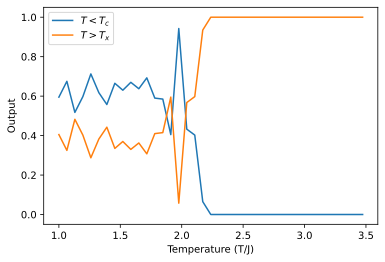

In [105]:
plt.plot(T,avg[:,1],label="$T < T_c$")
plt.plot(T,avg[:,0],label=("$T>T_x$"))
plt.xlabel("Temperature (T/J)")
plt.ylabel("Output")
plt.legend();

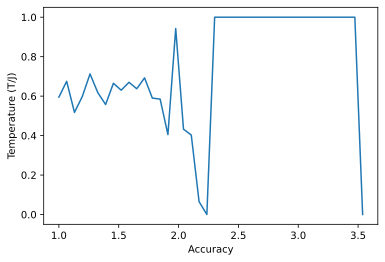

In [106]:
plt.plot(T,acc)
plt.xlabel("Accuracy")
plt.ylabel("Temperature (T/J)");

It seems to look right for high enough temperature. I am not sure what is going wronge below that range. 

### 2)

#### (a)

In [128]:
L20 = np.loadtxt('data1/Ising2D_config_L20.dat.gz')
Tval_20 = np.loadtxt('data1/Ising2D_temps_L20.dat')
L40 = np.loadtxt('data1/Ising2D_config_L40.dat.gz')
Tval_40 = np.loadtxt('data1/Ising2D_temps_L40.dat')
L80 = np.loadtxt('data1/Ising2D_config_L80.dat.gz')
Tval_80 = np.loadtxt('data1/Ising2D_temps_L80.dat')

##### L20:

In [112]:
import scipy.linalg
x = L20
N = x.shape[0]
x -= np.average(x,axis=0)
Σ = x.T @ x / (N-1)
λ,V = scipy.linalg.eigh(Σ)

In [113]:
λ = λ[::-1]
V = np.flip(V,axis=1)

print(f'λ = {λ}')
print(f'V = {V}')

λ = [2.58274436e+02 4.69206606e+00 4.51021730e+00 4.18847372e+00
 4.13060521e+00 3.05778616e+00 2.85374394e+00 2.67508582e+00
 2.50100969e+00 1.99978242e+00 1.84387502e+00 1.80076694e+00
 1.66712603e+00 1.59763353e+00 1.54666029e+00 1.52853851e+00
 1.47690542e+00 1.44244203e+00 1.33720897e+00 1.29948334e+00
 1.26464313e+00 1.17034262e+00 1.11898009e+00 1.08893998e+00
 1.06201925e+00 1.04056254e+00 1.00177710e+00 9.77500811e-01
 9.68666168e-01 9.27666790e-01 9.22959907e-01 8.86954986e-01
 8.63661347e-01 8.34854492e-01 8.13157040e-01 7.87637059e-01
 7.78521371e-01 7.54220058e-01 7.41690141e-01 7.22474195e-01
 7.18026134e-01 7.01393279e-01 6.94927915e-01 6.82943083e-01
 6.79263053e-01 6.57316512e-01 6.43756343e-01 6.34939640e-01
 6.25050780e-01 6.24163541e-01 6.16451499e-01 6.09751637e-01
 5.97839126e-01 5.82955741e-01 5.81948201e-01 5.76171462e-01
 5.74155686e-01 5.66129033e-01 5.56956326e-01 5.44847763e-01
 5.42206989e-01 5.31874370e-01 5.25061130e-01 5.20790277e-01
 5.11968413e-01 5.10

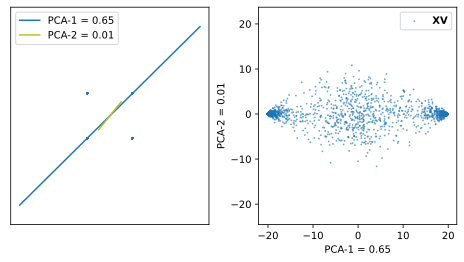

In [114]:
fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].scatter(x[:,0],x[:,1], s=1, alpha=0.5)

_x = np.linspace(-4,4,100)
_y = np.linspace(-0.5,0.5,100)
ax[0].plot(_x,V[1,0]/V[0,0]*_x, '-', color=colors[0], label=f'PCA-1 = {λ[0]/np.sum(λ):.2f}')
ax[0].plot(_y,V[1,1]/V[0,1]*_y, '-', color=colors[-2], label=f'PCA-2 = {λ[1]/np.sum(λ):.2f}')

ax[0].axis('equal')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].legend()

# perform the projection
px = x @ V

# this can alternatively be down via direct projection
direct = False
if direct:
    px = np.zeros_like(x)
    for n in range(x.shape[0]):
        for j in range(2):
            px[n,j] = np.dot(V[:,j],x[n,:])
    
ax[1].scatter(px[:,0],px[:,1], s=1, alpha=0.5, label=r'$\mathbf{X} \mathbf{V}$')
ax[1].set_xlabel(f'PCA-1 = {λ[0]/np.sum(λ):.2f}')
ax[1].set_ylabel(f'PCA-2 = {λ[1]/np.sum(λ):.2f}')
ax[1].axis('equal')
ax[1].legend()

fig.subplots_adjust(wspace=0.25)

#### L40:

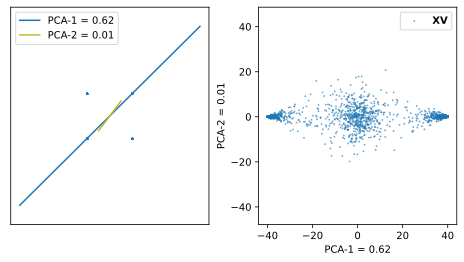

In [116]:

x = L40
N = x.shape[0]
x -= np.average(x,axis=0)
Σ = x.T @ x / (N-1)
λ,V = scipy.linalg.eigh(Σ)
λ = λ[::-1]
V = np.flip(V,axis=1)
fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].scatter(x[:,0],x[:,1], s=1, alpha=0.5)

_x = np.linspace(-4,4,100)
_y = np.linspace(-0.5,0.5,100)
ax[0].plot(_x,V[1,0]/V[0,0]*_x, '-', color=colors[0], label=f'PCA-1 = {λ[0]/np.sum(λ):.2f}')
ax[0].plot(_y,V[1,1]/V[0,1]*_y, '-', color=colors[-2], label=f'PCA-2 = {λ[1]/np.sum(λ):.2f}')

ax[0].axis('equal')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].legend()

# perform the projection
px = x @ V

# this can alternatively be down via direct projection
direct = False
if direct:
    px = np.zeros_like(x)
    for n in range(x.shape[0]):
        for j in range(2):
            px[n,j] = np.dot(V[:,j],x[n,:])
    
ax[1].scatter(px[:,0],px[:,1], s=1, alpha=0.5, label=r'$\mathbf{X} \mathbf{V}$')
ax[1].set_xlabel(f'PCA-1 = {λ[0]/np.sum(λ):.2f}')
ax[1].set_ylabel(f'PCA-2 = {λ[1]/np.sum(λ):.2f}')
ax[1].axis('equal')
ax[1].legend()

fig.subplots_adjust(wspace=0.25)

#### L80:

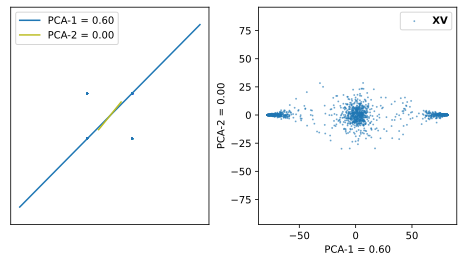

In [119]:

x = L80
N = x.shape[0]
x -= np.average(x,axis=0)
Σ = x.T @ x / (N-1)
λ,V = scipy.linalg.eigh(Σ)
λ = λ[::-1]
V = np.flip(V,axis=1)
fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].scatter(x[:,0],x[:,1], s=1, alpha=0.5)

_x = np.linspace(-4,4,100)
_y = np.linspace(-0.5,0.5,100)
ax[0].plot(_x,V[1,0]/V[0,0]*_x, '-', color=colors[0], label=f'PCA-1 = {λ[0]/np.sum(λ):.2f}')
ax[0].plot(_y,V[1,1]/V[0,1]*_y, '-', color=colors[-2], label=f'PCA-2 = {λ[1]/np.sum(λ):.2f}')

ax[0].axis('equal')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].legend()

# perform the projection
px = x @ V

# this can alternatively be down via direct projection
direct = False
if direct:
    px = np.zeros_like(x)
    for n in range(x.shape[0]):
        for j in range(2):
            px[n,j] = np.dot(V[:,j],x[n,:])
    
ax[1].scatter(px[:,0],px[:,1], s=1, alpha=0.5, label=r'$\mathbf{X} \mathbf{V}$')
ax[1].set_xlabel(f'PCA-1 = {λ[0]/np.sum(λ):.2f}')
ax[1].set_ylabel(f'PCA-2 = {λ[1]/np.sum(λ):.2f}')
ax[1].axis('equal')
ax[1].legend()

fig.subplots_adjust(wspace=0.25)

So it appears that the spread increases with L. 

#### b)

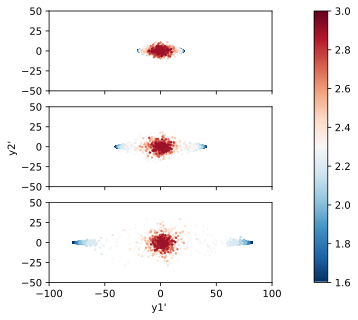

In [131]:
fig,ax = plt.subplots(3,1, sharex=True, figsize=(5,5))

ax[0].scatter(p20[:,0],p20[:,1],s=2,c=Tval_20,cmap='RdBu_r', vmin=1.6, vmax=3)
ax[1].scatter(p40[:,0],p40[:,1],s=2,c=Tval_20,cmap='RdBu_r', vmin=1.6, vmax=3)
plt.scatter(p80[:,0],p80[:,1],s=2,c=Tval_20,cmap='RdBu_r', vmin=1.6, vmax=3)

plt.setp(ax, xticks=np.linspace(-100,100,5), yticks=np.linspace(-50,50,5))
ax[1].set_ylabel("y2' ")
ax[2].set_xlabel("y1' ")

plt.colorbar(ax=ax, anchor=(1,0), ticks=np.linspace(1.6,3,8))

In [ ]:
#### c)

The te